In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import (GradientBoostingRegressor , RandomForestRegressor,
                              BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor)
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [130]:
itrain = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 
# this is not my test set this is a validation set 

print(itrain.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# EDA

1. understand how the dependent variable and independent variables relate.
2. clean the dataset and handle the missing data, outliers and categorical variables.
3. check if our data meets the assumptions required by most multivariate techniques.


- is the variable numerical or categorical

In [131]:
itrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
itrain.dtypes[1:20]

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
dtype: object

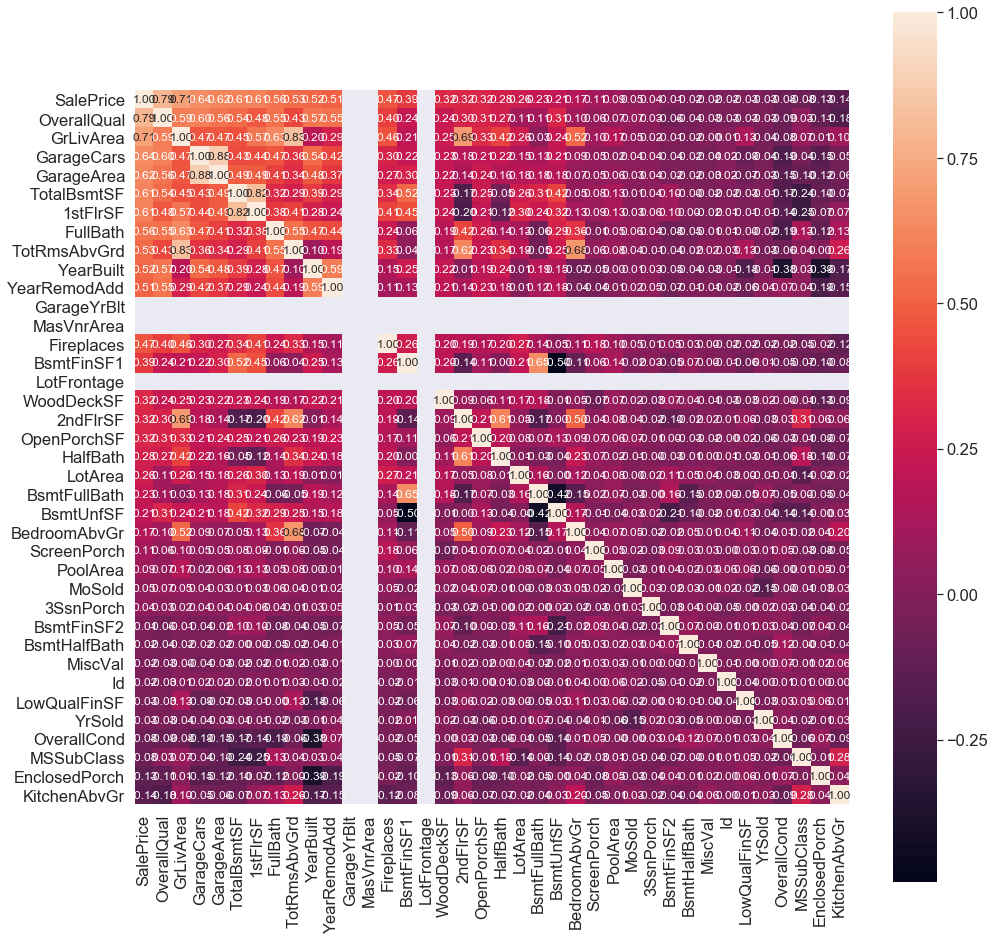

In [134]:
# WHICH VARIABLE ARE MOST CORRELATED WITH SALEPRICE 

plt.figure(figsize=(16,16))
corrmat = itrain.corr()
k = 78 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(itrain[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

the number of cars that fit into the garage is a consequence of the garage area. 
'GarageCars' and 'GarageArea' are basically the same so lets just keep 'GarageCars'

DROP 'GarageArea'

'TotalBsmtSF' and '1stFlrSF' also seem the same. We can keep 'TotalBsmtSF' 

DROP '1stFlrSF'

'TotRmsAbvGrd' and 'GrLivArea' are again the same. Lets keep 'TotRmsAbvGrd'

DROP 'GrLivArea'


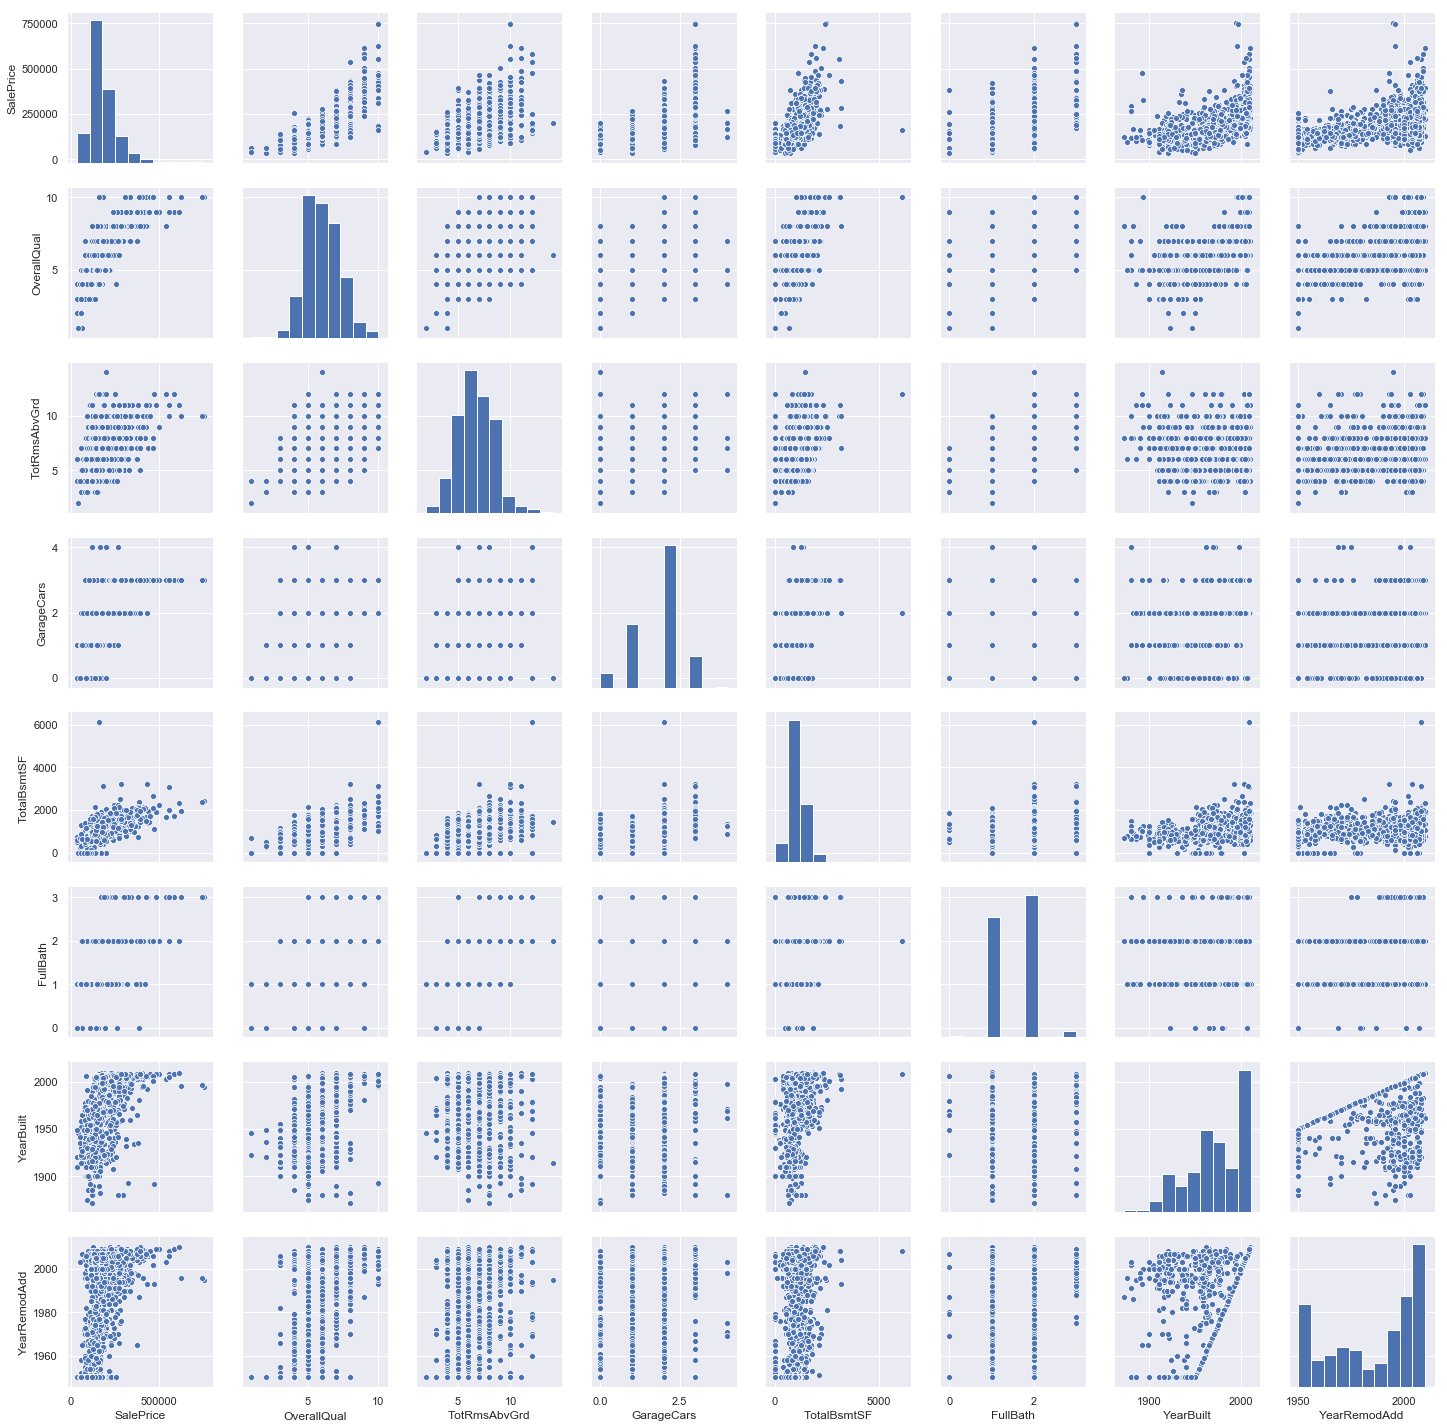

In [135]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

sns.pairplot(itrain[cols], size = 2.5)
sns.set(font_scale=1.50)
plt.show()

### Variables with Highest and lowest correlations to Sale Price

In [136]:
k = 78 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print('HIGHEST CORRELATED:')
print(cols)

ls = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
print('')
print('LOWEST CORRELATED:')
print(ls)

HIGHEST CORRELATED:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

LOWEST CORRELATED:
Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF',
       '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fir

## Combine Trn & Tst for Feature Engineering: 

- Assumptions to test
    - 1. Normality: normally distributed
    - 2. Equal Variance across predictor variables (homoscedasticity)
    - 3. Linear - predictors must be linearly correlated to target
    - 4. Multicollinearity - predictors arent highly correlated with one another

In [137]:
# Log transform the target for official scoring

# do log after combining data sets???????

itrain.SalePrice = np.log1p(itrain.SalePrice)

itrain.SalePrice[1:5]

1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [138]:
iy_train = itrain.SalePrice

itrain.drop("SalePrice", axis=1, inplace=True)

print(iy_train.shape)
iy_train.head()

(1460,)


0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [139]:
print(itrain.shape)

train = pd.concat([itrain, test], sort=False)

train = train.set_index('Id')

print(train.shape)

(1460, 80)
(2919, 79)


# Missing Data

columns with missing data: (79, 2)
(79,)


Text(0, 0.5, 'Total # of Missing Values')

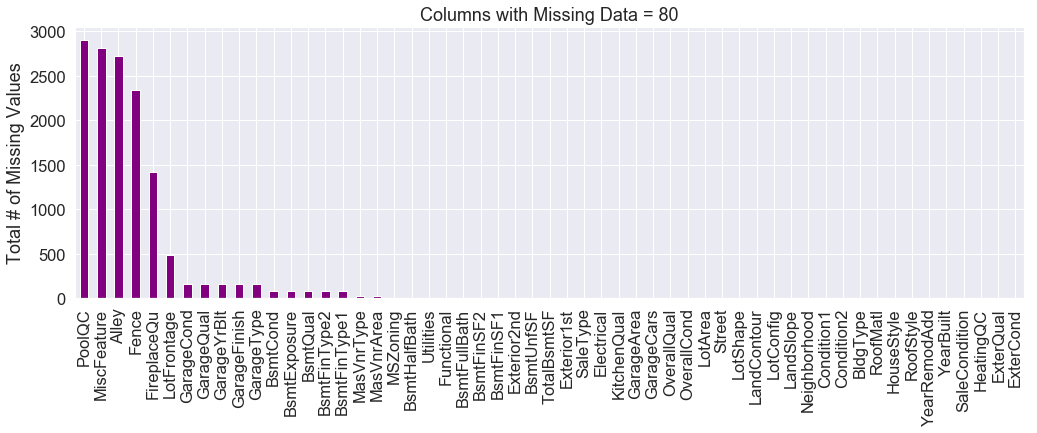

In [140]:
#missing data in train 

trnNAtotal = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([trnNAtotal, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# 20 columns with missing data 
print('columns with missing data:', missing_data.shape)
print(trnNAtotal.shape)

plot = trnNAtotal.nlargest(55).plot(kind='bar', \
               title='Columns with Missing Data = 80', figsize=(17,5), color = "purple")
plot.set_ylabel('Total # of Missing Values')

In [141]:
print('columns with missing data:', missing_data.shape)
print('columns with missing data = 80')

missing_data.head(20)

# having 0 total is equal to 1 total missing value in column

columns with missing data: (79, 2)
columns with missing data = 80


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [142]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


In [143]:
# numerical and categorical features

cat_features = train.select_dtypes(include = ["object"]).columns
num_features = train.select_dtypes(exclude = ["object"]).columns

#num_features = num_features.drop("SalePrice")

print('')
print("Numerical features : " + str(len(num_features)))
print('')
trainNum = train[num_features]
trainCat = train[cat_features]

print(trainNum.columns)
print('')
print("Categorical features : " + str(len(cat_features)))
print('')
print(trainCat.columns)


Numerical features : 36

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Categorical features : 43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 

In [144]:
print('PoolQC')
print(train.PoolQC.unique())
print('')
print('MiscFeature')
print(train.MiscFeature.unique())
print('')
print('Alley')
print(train.Alley.unique())
print('')
print('Fence')
print(train.Fence.unique())
print('')
print('FireplaceQu')
print(train.FireplaceQu.unique())
print('')
print('BsmtQual')
print(train.BsmtQual.unique())
print('')
print('GarageType')
print(train.GarageType.unique())
print('')
print('BsmtCond')
print(train.BsmtCond.unique())
print('')
print('BsmtExposure')
print(train.BsmtExposure.unique())
print('')
print('BsmtFinType1')
print(train.BsmtFinType1.unique())
print('')
print('BsmtFinType2')
print(train.BsmtFinType2.unique())
print('')
print('GarageFinish')
print(train.GarageFinish.unique())
print('')
print('GarageQual')
print(train.GarageQual.unique())
print('')
print('GarageCond')
print(train.GarageCond.unique())

PoolQC
[nan 'Ex' 'Fa' 'Gd']

MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']

Alley
[nan 'Grvl' 'Pave']

Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']

GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']

BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

GarageFinish
['RFn' 'Unf' 'Fin' nan]

GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


### CATEGORICAL: some variables are NA if the feature doesn't exist, these need to be accounted for: 
- fill na with No
- encode 2 numerical features to become categorical which they rightfully are
- encode categorical variables

## Standardize: 

In [145]:
# Standardize numerical features
stdSc = StandardScaler()
train.loc[:, num_features] = stdSc.fit_transform(train.loc[:, num_features])
#X_test.loc[:, num_features] = stdSc.transform(X_test.loc[:, num_features])

In [146]:
# PoolQC : description.txt indicates NA = "no pool"
# MiscFeature : description.txt indicates NA = "no misc feature"
# Alley : description.txt indicates NA = "no alley access"
# Fence : description.txt indicates NA = "no fence"
# FireplaceQu : description.txt indicates NA = "no fireplace"
# BsmtQual etc : description.txt indicates NA = "no basement"
# GarageType etc : description.txt indicates NA = "no garage"

train.PoolQC = train.PoolQC.fillna("No")
train.MiscFeature = train.MiscFeature.fillna("No")
train.Alley = train.Alley.fillna("None")
train.Fence = train.Fence.fillna("No")
train.FireplaceQu = train.FireplaceQu.fillna("No")

# basement
train.BsmtQual = train.BsmtQual.fillna("No")
train.BsmtCond = train.BsmtCond.fillna("No")
train.BsmtExposure = train.BsmtExposure.fillna("No")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No")
train.BsmtFinType2  = train.BsmtFinType2.fillna("No")

# garage
train.GarageType = train.GarageType.fillna("No")
train.GarageFinish = train.GarageFinish.fillna("No")
train.GarageQual = train.GarageQual.fillna("No")
train.GarageCond = train.GarageCond.fillna("No")

# encode numerical features into categorical features: 
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 
                                       45 : "SC45", 50 : "SC50", 60 : "SC60", 
                                       70 : "SC70", 75 : "SC75", 80 : "SC80", 
                                       85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 
                                       190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 
                                   5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 
                                   9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# Encode categorical features into numerical features

     #"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
     #"BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
     #"BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
     #"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
     #"ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
     #"ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
     #"FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
     #"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     #"LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
     #"LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
     #"PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
     # "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
     #"Street" : {"Grvl" : 1, "Pave" : 2},
     #"Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


# Cannot compare types 'ndarray(dtype=int64)' and 'str'
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2}})
train = train.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}})
train = train.replace({"BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                         "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})
train = train.replace({"BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                         "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})   
train = train.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}})
train = train.replace({"FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, 
                                       "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8}})
train = train.replace({"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
train = train.replace({"LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}})
train = train.replace({"LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})
train = train.replace({"PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}})
train = train.replace({"PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})
train = train.replace({"Street" : {"Grvl" : 1, "Pave" : 2}})
train = train.replace({"Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In [147]:
train.dtypes[1:10]

MSZoning        object
LotFrontage    float64
LotArea        float64
Street           int64
Alley           object
LotShape         int64
LandContour     object
Utilities      float64
LotConfig       object
dtype: object

### Combine existing features and drop insignificant features

In [148]:
train.drop('MSSubClass', axis = 1, inplace= True)
train.drop('YrSold', axis = 1, inplace= True)
train.drop('LowQualFinSF', axis = 1, inplace= True)
train.drop('MiscVal', axis = 1, inplace= True)
train.drop('MoSold', axis = 1, inplace= True)

# overall quality of house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
train.drop('OverallCond', axis = 1, inplace= True)

# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]

# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]

# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
train.drop('KitchenAbvGr', axis = 1, inplace= True)

# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]

# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]

# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]

train.drop('PoolArea', axis = 1, inplace= True)

# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])

train.drop('BsmtHalfBath', axis = 1, inplace= True)

# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]

# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]

train.drop('3SsnPorch', axis = 1, inplace= True)
train.drop('EnclosedPorch', axis = 1, inplace= True)
train.drop('ScreenPorch', axis = 1, inplace= True)

# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

### Handle remaining missing values for numerical features by using median as replacement


In [150]:
trnNAtotal = train.isnull().sum().sort_values(ascending=False)

print(trnNAtotal.shape)
print('')
print(trnNAtotal.head())

print("NAs for numerical features in train : " +
      str(trainNum.isnull().values.sum()))

trainNum = trainNum.fillna(trainNum.median())

print("Remaining NAs for numerical features in train : " +
      str(trainNum.isnull().values.sum()))

(80,)

LotFrontage    486
GarageYrBlt    159
MasVnrType      24
HasMasVnr       24
MasVnrArea      23
dtype: int64
NAs for numerical features in train : 678
Remaining NAs for numerical features in train : 0


## Skewed Variables:

In [151]:
# Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 
# is considered at least moderately skewed

skewness = trainNum.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print(str(skewness.shape[0]) + " skewed features to log transform")

skewed_features = skewness.index
trainNum[skewed_features] = np.log1p(trainNum[skewed_features])

skewed_features

27 skewed features to log transform


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

# Dummy Variables: 

In [152]:
# Create dummy features for categorical values via one-hot encoding
# 
print("Remaining NAs for categorical features in train : " + 
      str(trainCat.isnull().values.sum()))

print("NAs for categorical features in train : " + 
      str(trainCat.isnull().values.sum()))

trainCat = pd.get_dummies(trainCat)


test['enc_street'] = pd.get_dummies(test.Street, drop_first= True)


Remaining NAs for categorical features in train : 13287
NAs for categorical features in train : 13287


In [153]:
# rejoin categorical and numerical features
train = pd.concat([trainNum, trainCat], axis = 1)

print("New number of features : " + str(train.shape[1]))

New number of features : 288


In [154]:
print(train.shape)
train.head()

(2919, 288)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.044522,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4.262680,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,4.110874,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Separate into CleanTrain and CleanTest

In [155]:
#train = train.iloc[0:itrain.shape[0],:]
#test = train.iloc[itrain.shape[1]:,:]

CleanTrain = train.iloc[0:itrain.shape[0],:]  # train[:itrain.shape[0]]
CleanTest = train.iloc[itrain.shape[0]:,:]   # train[itrain.shape[0]:]


#X_train = train.iloc[:itrain, :]
#X_test = train.iloc[itrain:, :]

#df_finalTrain = df_traintest.iloc[0:df_train.shape[0],:]
#df_finalTest = df_traintest.iloc[df_train.shape[0]:,:]

print(CleanTrain.shape)
print(CleanTest.shape)


CleanTrain.to_csv('CleanTrain.csv')
CleanTest.to_csv('CleanTest.csv')

CleanTrain.head()

(1460, 288)
(1459, 288)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.044522,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4.262680,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,4.110874,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [156]:
CleanTest.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,1.791759,0.000000,1961.0,1.0,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,1.945910,0.000000,1958.0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,1.945910,0.693147,1997.0,2.0,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,2.079442,0.693147,1998.0,2.0,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1465,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,1.791759,0.000000,1992.0,2.0,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
